In [1]:
%cd /mnt/c/Users/kwj93/bio_info1

/mnt/c/Users/kwj93/bio_info1


In [9]:
!mkdir -p YOA-work

In [10]:
%cp -r /mnt/c/Users/kwj93/bio_info1/YOA-data/*.bam /mnt/c/Users/kwj93/bio_info1/YOA-work/

In [11]:
!wget -O /mnt/c/Users/kwj93/bio_info1/YOA-work/human-gencode.gtf.gz https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_48/gencode.v48.annotation.gtf.gz

--2025-05-26 14:46:26--  https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_48/gencode.v48.annotation.gtf.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58971717 (56M) [application/x-gzip]
Saving to: ‘/mnt/c/Users/kwj93/bio_info1/YOA-work/human-gencode.gtf.gz’

/mnt/c/Users/kwj93/ 100%[===================>]  56.24M  2.34MB/s    in 17s     

2025-05-26 14:46:44 (3.33 MB/s) - ‘/mnt/c/Users/kwj93/bio_info1/YOA-work/human-gencode.gtf.gz’ saved [58971717/58971717]



In [13]:
!gunzip ./YOA-work/human-gencode.gtf.gz

In [15]:
!mv ./YOA-work/ENCFF551NSA.bam ./YOA-work/CLIP_PABPC4_1.bam

In [16]:
!mv ./YOA-work/ENCFF692YDC.bam ./YOA-work/CLIP_PABPC4_2.bam

In [18]:
!featureCounts -p -a ./YOA-work/human-gencode.gtf -o ./YOA-work/read-counts.txt ./YOA-work/*.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.1.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 2 BAM files                                      ||
||                                                                            ||
||                           CLIP_PABPC4_1.bam                                ||
||                           CLIP_PABPC4_2.bam                                ||
||                                                               

In [3]:
import pandas as pd
cnts = pd.read_csv('./YOA-work/read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,./YOA-work/CLIP_PABPC4_1.bam,./YOA-work/CLIP_PABPC4_2.bam
Geneid,,,,,,,
ENSG00000290825.2,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,11121;11125;11410;11411;11426;11770;11819;1182...,11211;11211;11671;11671;11671;11844;11844;1184...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,2898,2,0
ENSG00000223972.6,chr1;chr1;chr1;chr1;chr1;chr1,12010;12179;12613;12975;13221;13453,12057;12227;12697;13052;13374;13670,+;+;+;+;+;+,632,0,0
ENSG00000310526.1,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14356;14356;14356;14356;14356;14356;14356;1436...,14829;14829;14829;14829;14829;14829;14829;1482...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,6775,25,2
ENSG00000227232.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1,14696;14970;15796;16607;16858;17233;17606;1791...,14829;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-,1380,0,0
ENSG00000278267.1,chr1,17369,17436,-,68,0,0


In [4]:
gtf_file = './YOA-work/human-gencode.gtf' 

feature_types = pd.read_csv(
    gtf_file, sep='\t', comment='#', header=None, usecols=[2]
)
summary = feature_types[2].value_counts()
print(summary)


2
exon              2155691
CDS                902352
UTR                391780
transcript         385669
start_codon         99413
stop_codon          93361
gene                78686
Selenocysteine        130
Name: count, dtype: int64


In [5]:
!grep '	UTR	.*	[+-]	.*transcript_support_level "1"' ./YOA-work/human-gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode_UTR.gtf
!head gencode_UTR.gtf

chr1	HAVANA	UTR	959241	959256	.	-	.	ENST00000327044.7
chr1	HAVANA	UTR	944203	944696	.	-	.	ENST00000327044.7
chr1	HAVANA	UTR	960584	960693	.	+	.	ENST00000338591.8
chr1	HAVANA	UTR	965189	965719	.	+	.	ENST00000338591.8
chr1	HAVANA	UTR	966482	966531	.	+	.	ENST00000379410.8
chr1	HAVANA	UTR	974573	975865	.	+	.	ENST00000379410.8
chr1	HAVANA	UTR	966502	966531	.	+	.	ENST00000379407.7
chr1	HAVANA	UTR	974573	975008	.	+	.	ENST00000379407.7
chr1	HAVANA	UTR	999974	1000097	.	-	.	ENST00000304952.11
chr1	HAVANA	UTR	998964	999061	.	-	.	ENST00000304952.11


In [33]:
!awk -F'\t' -v OFS='\t' '{print $1, $4-1, $5, $9, 0, $7}' gencode_UTR.gtf | \
 sort -k1,1 -k2,3n > gencode_UTR.bed
!head gencode_UTR.bed

chr1	944202	944696	ENST00000327044.7	0	-
chr1	959240	959256	ENST00000327044.7	0	-
chr1	960583	960693	ENST00000338591.8	0	+
chr1	965188	965719	ENST00000338591.8	0	+
chr1	966481	966531	ENST00000379410.8	0	+
chr1	966501	966531	ENST00000379407.7	0	+
chr1	974572	975008	ENST00000379407.7	0	+
chr1	974572	975865	ENST00000379410.8	0	+
chr1	998963	999061	ENST00000304952.11	0	-
chr1	999973	1000097	ENST00000304952.11	0	-


In [12]:
!(samtools view -H ./YOA-work/CLIP_PABPC4_1.bam; \
  samtools view -F4 ./YOA-work/CLIP_PABPC4_1.bam | \
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \
 samtools view -b -o ./YOA-work/filtered_CLIP_PABPC4_1.bam

In [13]:
!(samtools view -H ./YOA-work/CLIP_PABPC4_2.bam; \
  samtools view -F4 ./YOA-work/CLIP_PABPC4_2.bam | \
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \
 samtools view -b -o ./YOA-work/filtered_CLIP_PABPC4_2.bam

In [16]:
!ls -al ./YOA-work/*CLIP_PABPC4_*.bam

-rwxrwxrwx 1 kwj9354 kwj9354 278141440 May 26 14:32 ./YOA-work/CLIP_PABPC4_1.bam
-rwxrwxrwx 1 kwj9354 kwj9354  63649763 May 26 14:32 ./YOA-work/CLIP_PABPC4_2.bam
-rwxrwxrwx 1 kwj9354 kwj9354 240612348 Jun  2 16:55 ./YOA-work/filtered_CLIP_PABPC4_1.bam
-rwxrwxrwx 1 kwj9354 kwj9354  47573916 Jun  2 16:55 ./YOA-work/filtered_CLIP_PABPC4_2.bam


In [25]:
!bedtools bamtobed -i ./YOA-work/filtered_CLIP_PABPC4_1.bam > ./YOA-work/filtered_CLIP_PABPC4_1.bed

In [34]:
!bedtools intersect -s -a ./YOA-work/filtered_CLIP_PABPC4_1.bed -b gencode_UTR.bed -wb > PABPC4_gene_overlap.bed

In [39]:
! awk '{print $10}' PABPC4_gene_overlap.bed | sort | uniq > PABPC4_binding_genes.txt

In [51]:
!pip install mygene

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [mygene]


In [52]:
import mygene

with open('PABPC4_binding_genes.txt', 'r') as f:
    enst_list = [line.strip().split('.')[0] for line in f if line.strip()] 

mg = mygene.MyGeneInfo()
query = mg.querymany(enst_list, scopes='ensembltranscript', fields='symbol', species='human')

symbol_list = [q['symbol'] for q in query if 'symbol' in q]

with open('binding_genes_symbol.txt', 'w') as f:
    for sym in symbol_list:
        f.write(sym + '\n')

print(f'총 {len(symbol_list)}개의 gene symbol이 변환되어 저장되었습니다.')

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
2 input query terms found no hit:	['ENST00000301905', 'ENST00000589632']


총 22470개의 gene symbol이 변환되어 저장되었습니다.


In [ ]:
# 빈도수 확인
!awk '{print $10}' PABPC4_gene_overlap.bed | sort | uniq -c | sort -nr

In [44]:
!pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 7.4 MB/s eta 0:00:00


In [45]:
import gseapy as gp
print(gp.get_library_name(organism='Human'))

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'COMPARTMENTS_Curated_2025', 'COMPARTMENTS_Experimental_2025', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DGIdb_Drug_Targets_2024', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_CRISPR_GeneDependency_CellLines_2023', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_C

In [54]:
enrich_go = gp.enrichr(
    gene_list='binding_genes_symbol.txt',                
    gene_sets='GO_Biological_Process_2025',       
    organism='Human',                            
    outdir='gseapy_GO_results'                   
)
# KEGG 분석
enrich_kegg = gp.enrichr(
    gene_list='binding_genes_symbol.txt',
    gene_sets='KEGG_2021_Human',
    organism='Human',
    outdir='gseapy_KEGG_results'
)

<Axes: title={'center': 'KEGG Pathway Enrichment'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

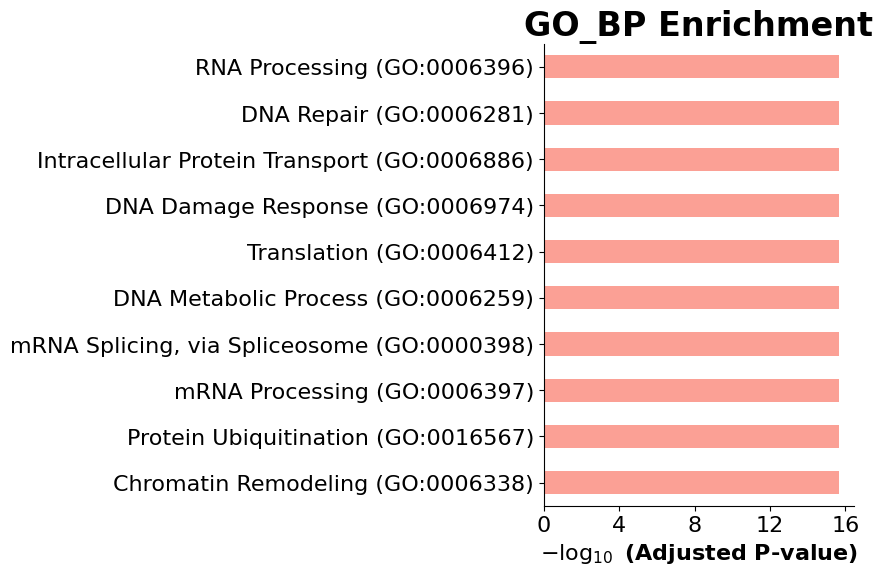

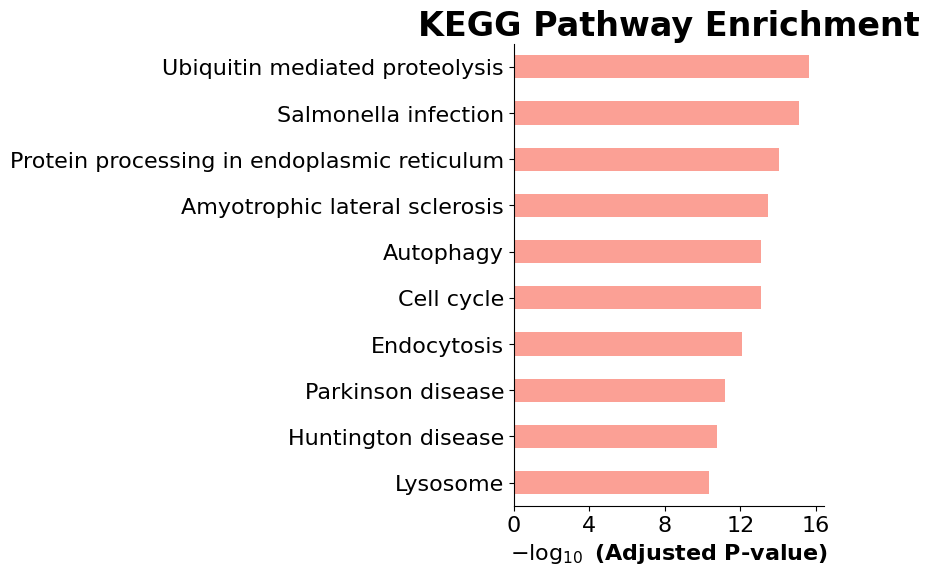

In [56]:
from gseapy.plot import barplot

barplot(enrich_go.results.head(40), title='GO_BP Enrichment')
barplot(enrich_kegg.results.head(40), title='KEGG Pathway Enrichment')